Combined Cycle Power Plant

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [12]:
df=pd.read_csv('data\cycle_power_plant.csv')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [13]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

defining x and y

In [32]:
x=df.drop('PE',axis=1).values.reshape(-1,4)
y=df['PE'].values
print(y)
print(x.shape)
print(y.shape)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]
(9568, 4)
(9568,)


split train and test data

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
poly=PolynomialFeatures(degree=2)
x_train=poly.fit_transform(x_train)
x_test=poly.transform(x_test)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(y_pred)

[432.90143024 457.50435837 462.15661851 ... 436.13786644 435.34801663
 439.04411621]


In [34]:
v=pd.DataFrame({'actual':y_test,'predicted':y_pred,'difference':y_pred-y_test})
print(v)

      actual   predicted  difference
0     431.23  432.901430    1.671430
1     460.01  457.504358   -2.505642
2     461.14  462.156619    1.016619
3     445.90  447.794369    1.894369
4     451.29  456.402561    5.112561
...      ...         ...         ...
2866  475.86  471.346787   -4.513213
2867  477.94  473.497093   -4.442907
2868  426.86  436.137866    9.277866
2869  433.40  435.348017    1.948017
2870  441.94  439.044116   -2.895884

[2871 rows x 3 columns]


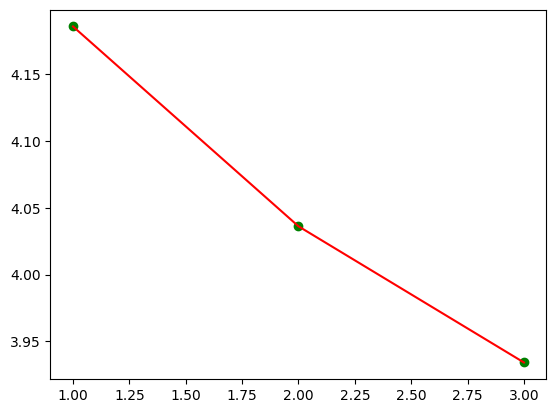

In [35]:
number_degrees = [1,2,3]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)
  
   x= poly_model.fit_transform(x_train)
   poly_model.fit(x, y_train)
   x_te=poly_model.fit_transform(x_test)
   lr = LinearRegression()
   lr.fit(x, y_train)
   y_pred = lr.predict(x_te)
  
   plt_mean_squared_error.append(mean_squared_error(y_test, y_pred, squared=False))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red")

(2871,)
(2871,)


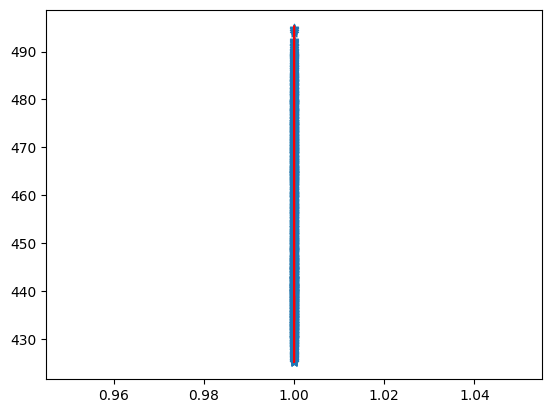

In [46]:
print(x_test[:,0].shape)
print(y_test.shape)
plt.scatter(x_test[:,0],y_test,marker='*')
plt.plot(x_test[:,0],y_pred,color='red')

Plots

<Axes: >

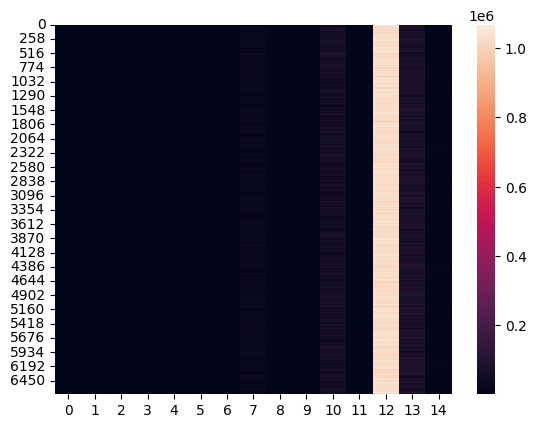

In [9]:
sns.heatmap(x_train)